In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


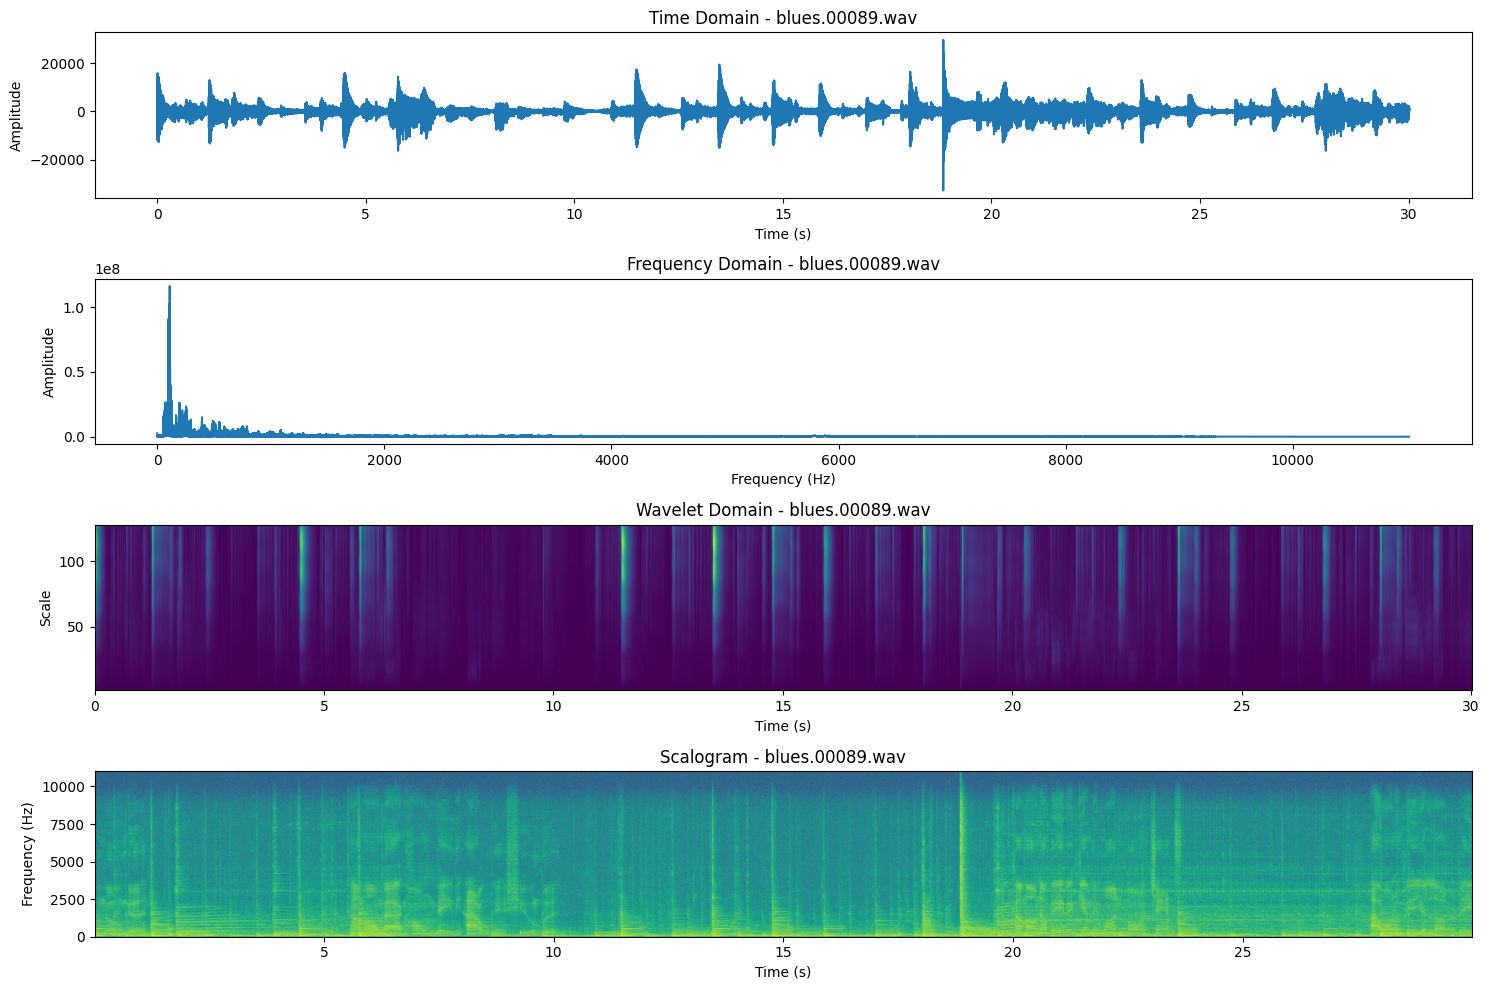

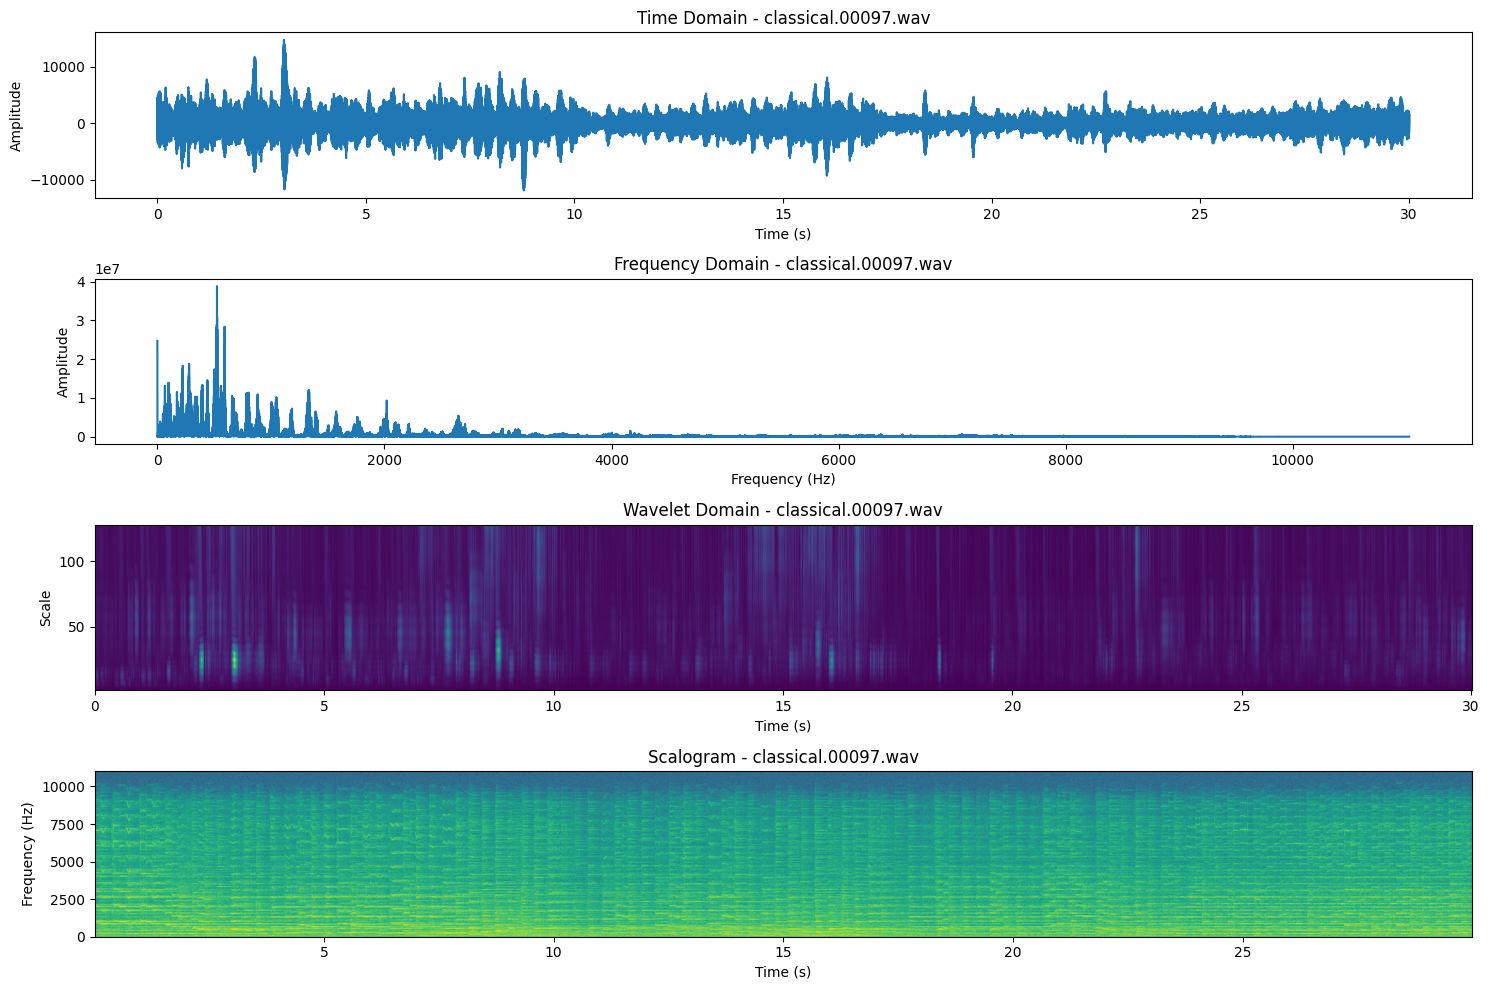

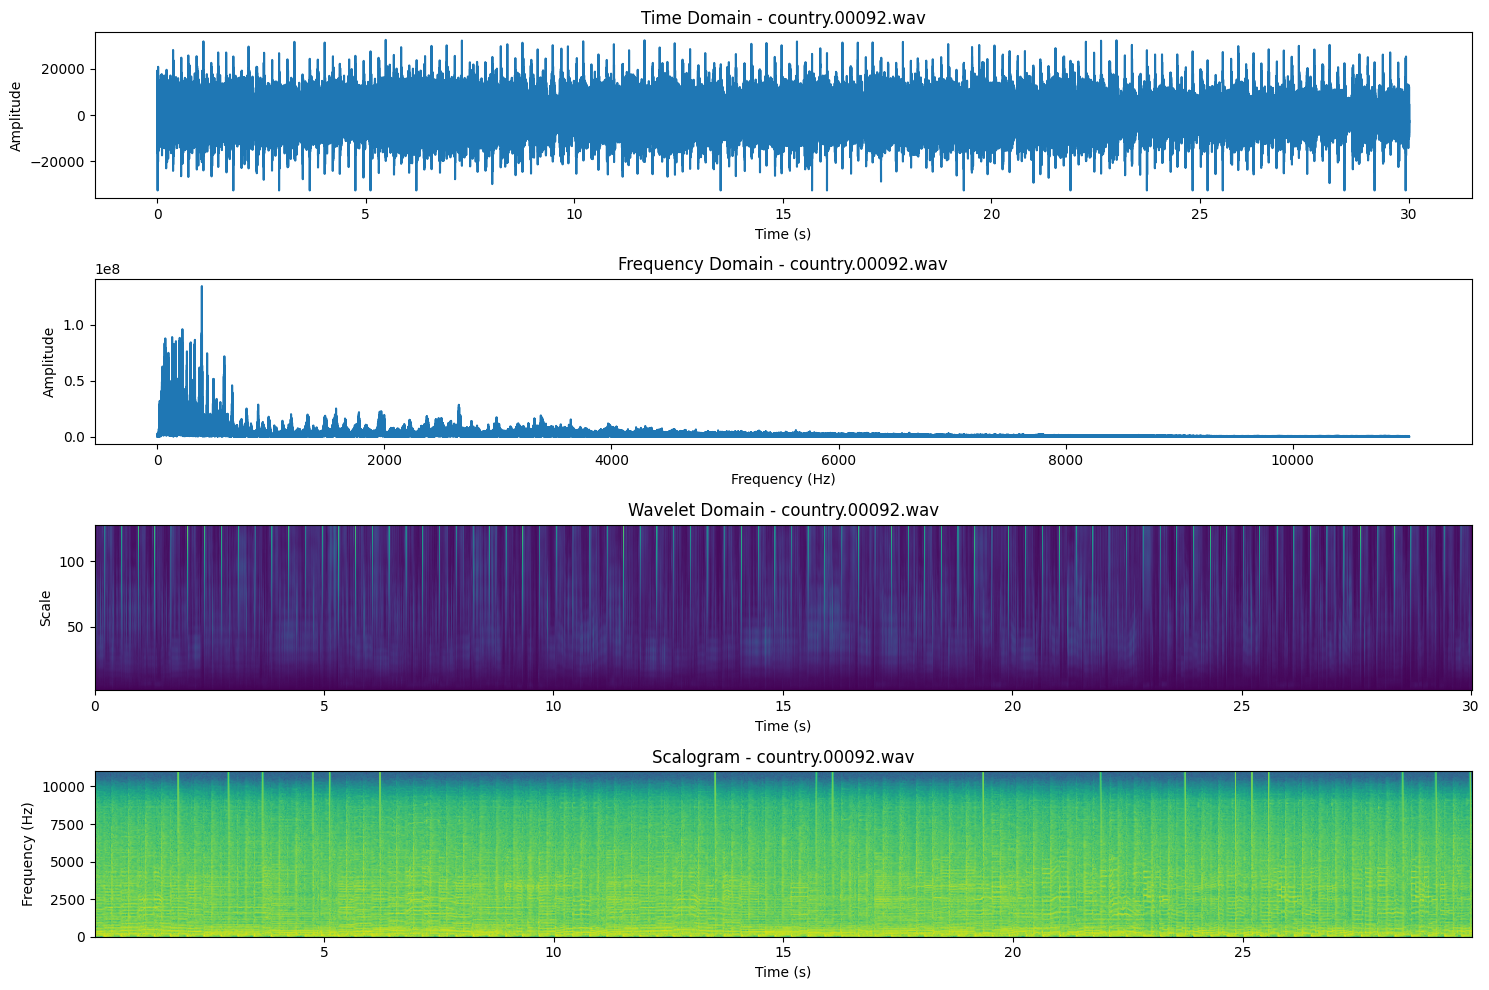

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import wavfile
from scipy.fftpack import fft

def plot_audio_representations(file):
    rate, data = wavfile.read(file)
    time = np.linspace(0, len(data) / rate, num=len(data))
    plt.figure(figsize=(15, 10))
    plt.subplot(4, 1, 1)
    plt.plot(time, data)
    plt.title(f"Time Domain - {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    freqs = np.fft.rfftfreq(len(data), 1 / rate)
    fft_data = np.abs(fft(data))
    plt.subplot(4, 1, 2)
    plt.plot(freqs, fft_data[:len(freqs)])
    plt.title(f"Frequency Domain - {file}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    coeffs, freqs = pywt.cwt(data, np.arange(1, 128), 'cmor', sampling_period=1/rate)
    plt.subplot(4, 1, 3)
    plt.imshow(np.abs(coeffs), extent=[0, time[-1], 1, 128], cmap='viridis', aspect='auto', origin='lower')
    plt.title(f"Wavelet Domain - {file}")
    plt.ylabel("Scale")
    plt.xlabel("Time (s)")

    plt.subplot(4, 1, 4)
    plt.specgram(data, Fs=rate, NFFT=1024, noverlap=512, cmap='viridis')
    plt.title(f"Scalogram - {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

    plt.tight_layout()
    plt.show()

plot_audio_representations("blues.00089.wav")
plot_audio_representations("classical.00097.wav")
plot_audio_representations("country.00092.wav")

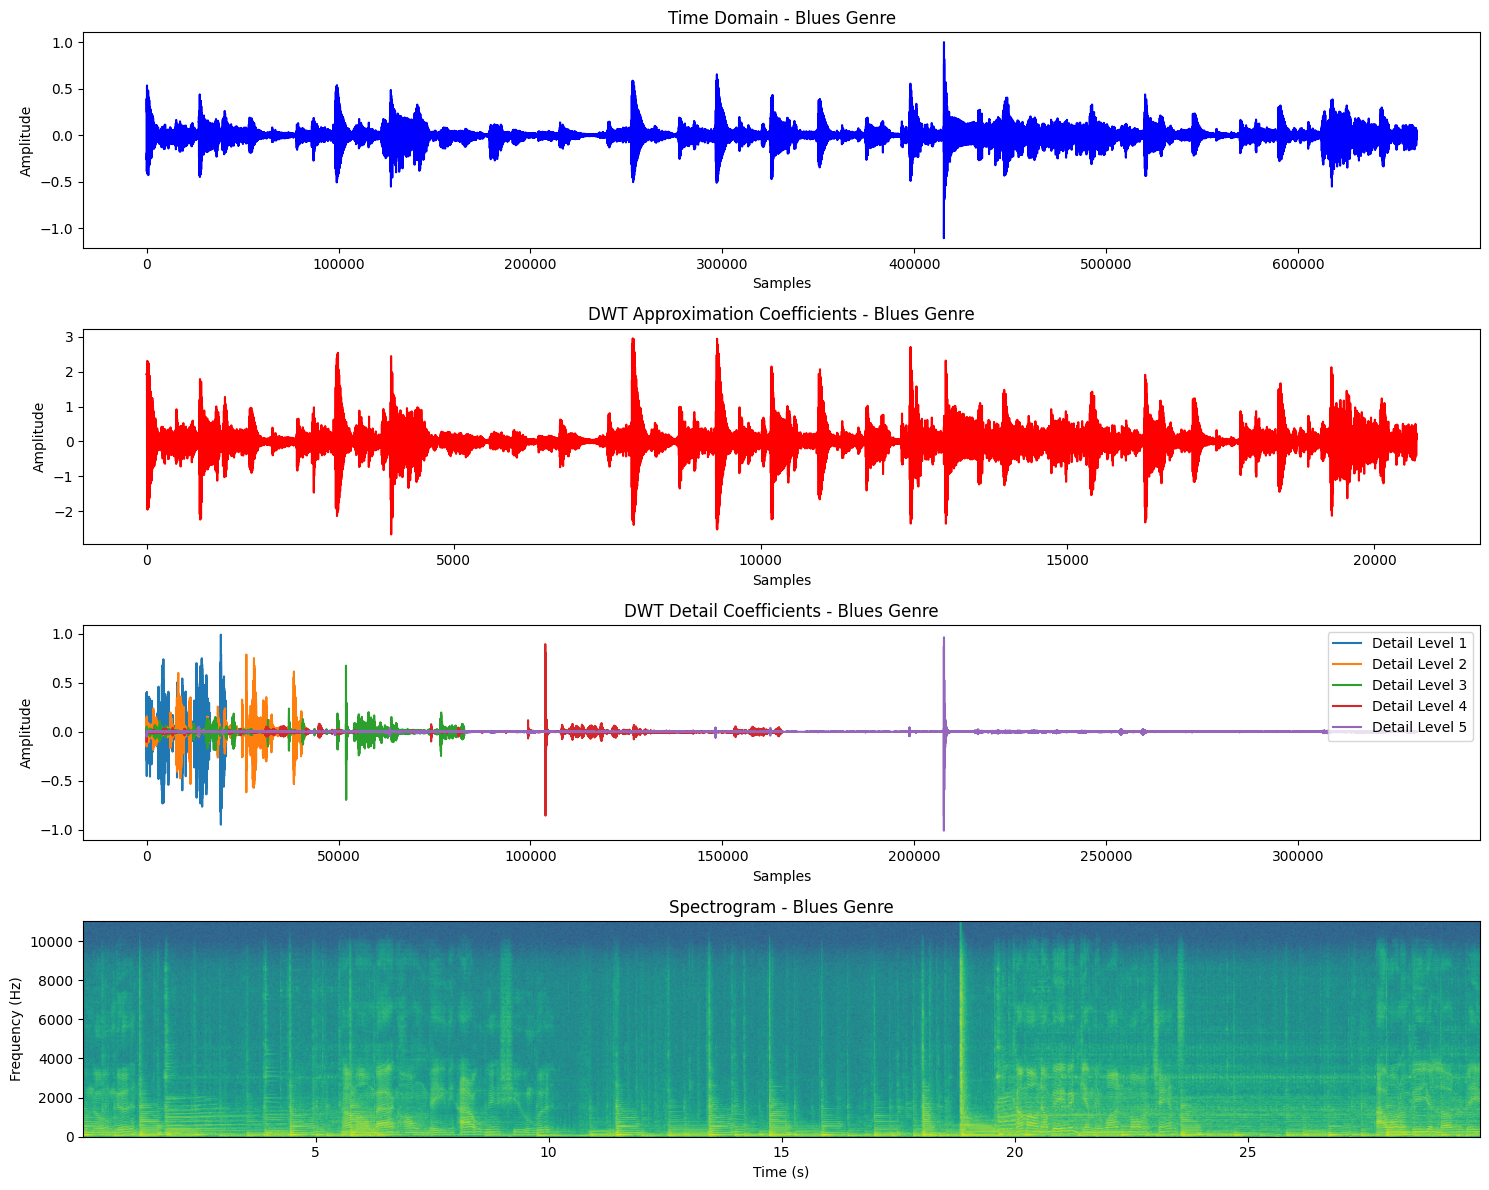

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import wavfile

# 1. Load and preprocess the audio file
rate, data = wavfile.read("blues.00089.wav")
if len(data.shape) > 1:
    data = data[:, 0]  # Convert stereo to mono
data = data / np.max(np.abs(data))  # Normalize the signal

# 2. Apply Discrete Wavelet Transform (DWT) using filter bank technique
wavelet = 'db4'
coeffs = pywt.wavedec(data, wavelet, level=5)
approximation = coeffs[0]
details = coeffs[1:]

# Reconstruct the signal from coefficients
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# 3. Characteristic for the Genre and Spectrogram
plt.figure(figsize=(15, 12))

# Original signal in time domain
plt.subplot(4, 1, 1)
plt.plot(data, color='blue')
plt.title("Time Domain - Blues Genre")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

# DWT coefficients (approximation and details)
plt.subplot(4, 1, 2)
plt.plot(approximation, color='red')
plt.title("DWT Approximation Coefficients - Blues Genre")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 3)
for i, detail in enumerate(details):
    plt.plot(detail, label=f"Detail Level {i+1}")
plt.title("DWT Detail Coefficients - Blues Genre")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()

# Spectrogram
plt.subplot(4, 1, 4)
plt.specgram(data, Fs=rate, NFFT=1024, noverlap=512, cmap='viridis')
plt.title("Spectrogram - Blues Genre")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()

In [ ]:
print("Sizes of DWT Coefficients:")
for i, coeff in enumerate(coeffs):
    print(f"Level {i}: {len(coeff)}")


Sizes of DWT Coefficients:
Level 0: 20687
Level 1: 20687
Level 2: 41368
Level 3: 82730
Level 4: 165453
Level 5: 330900
